### Importing Basic Modules

In [281]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Data

In [336]:
train = pd.read_csv("../datasets/train.csv")
test = pd.read_csv("../datasets/test.csv")

### Analyzing the Data 

In [283]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [284]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [285]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Checking for Missing values

In [286]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [287]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [288]:
train.Age.mean()

29.69911764705882

### Checking the values for Imputing missing values

In [289]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [290]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


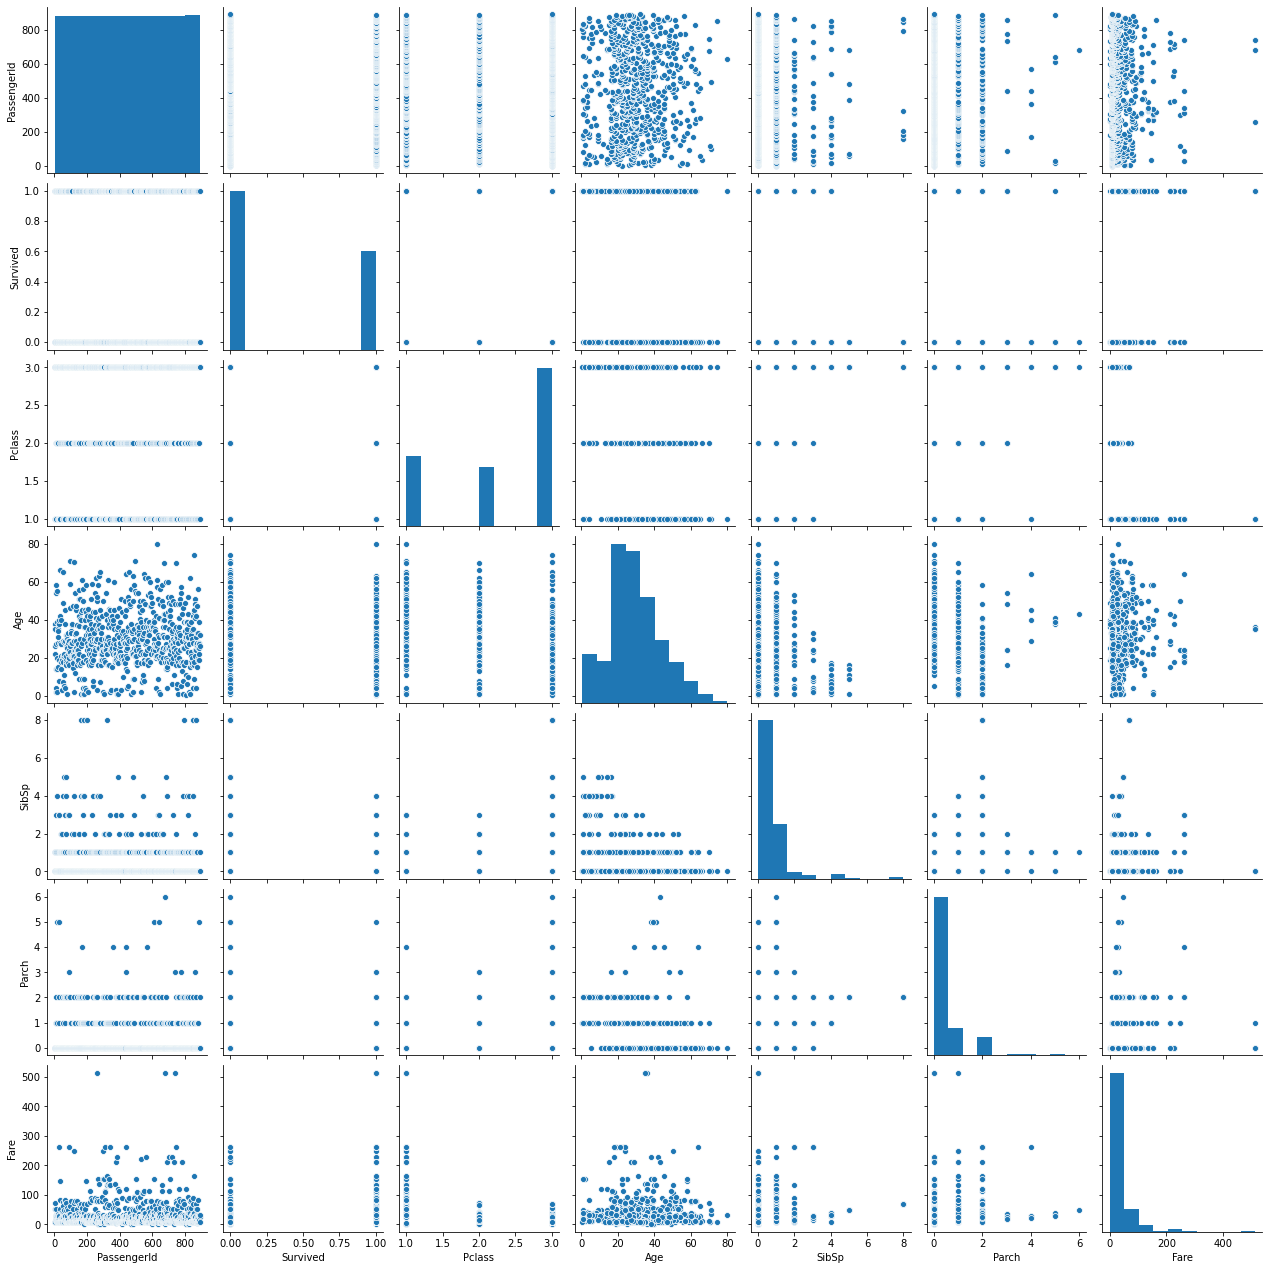

In [291]:
sns.pairplot(train)

In [292]:
train.Age.median()

28.0

In [293]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [294]:
test.Embarked.value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

## Imputing Missing Values

#### Age : Bases on Median 

In [295]:
##Impute Missing value
train.Age.fillna(train.Age.median(),inplace = True)
test.Age.fillna(test.Age.median(),inplace = True)

#### Embarked : Based on Mode

In [296]:
train.Embarked.fillna('S',inplace = True)

#### Fare: Based on Median

In [297]:
test.Fare.fillna(test.Fare.median(),inplace = True)

### Rechecking for Cabin Missing values

In [298]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [299]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [300]:
train.Cabin.value_counts()

G6             4
B96 B98        4
C23 C25 C27    4
F2             3
D              3
              ..
E34            1
D46            1
E50            1
E63            1
D9             1
Name: Cabin, Length: 147, dtype: int64

In [301]:
train['Cabin'].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

### Creating New columns for Imputing missing cabin codes

In [302]:
train['Cabin'] = train.Cabin.str.strip() 
test['Cabin'] = test.Cabin.str.strip() 

In [303]:
train.Cabin[(train.Cabin.str[1] == ' ') == True] = train.Cabin[(train.Cabin.str[1] == ' ') == True].str[2:]
test.Cabin[(test.Cabin.str[1] == ' ') == True] = test.Cabin[(test.Cabin.str[1] == ' ') == True].str[2:]

<ipython-input-303-81e5b4564b8c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Cabin[(train.Cabin.str[1] == ' ') == True] = train.Cabin[(train.Cabin.str[1] == ' ') == True].str[2:]
<ipython-input-303-81e5b4564b8c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.Cabin[(test.Cabin.str[1] == ' ') == True] = test.Cabin[(test.Cabin.str[1] == ' ') == True].str[2:]


In [304]:
test.Cabin.str[0].value_counts()

C    35
B    18
D    13
E    11
A     7
F     5
G     2
Name: Cabin, dtype: int64

In [305]:
## First value of cabin
train['cabin_code'] = train.Cabin.str[0] 
test['cabin_code'] = test.Cabin.str[0]

In [306]:
train.cabin_code.value_counts()

C    59
B    47
E    33
D    33
A    15
F     9
G     7
T     1
Name: cabin_code, dtype: int64

In [307]:
test.cabin_code.value_counts()

C    35
B    18
D    13
E    11
A     7
F     5
G     2
Name: cabin_code, dtype: int64

In [308]:
train[(train.Cabin.str[3] == ' ') == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S,C
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C,D
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C,B
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C,B
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,B
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.00,3,2,19950,263.0000,C23 C25 C27,S,C
390,391,1,1,"Carter, Mr. William Ernest",male,36.00,1,2,113760,120.0000,B96 B98,S,B


In [309]:
train[(train.Cabin.str[7] == ' ') == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,C
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,B
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S,C
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,B
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,B
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,B


In [310]:
train.groupby('cabin_code').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
cabin_code,,,,,,,
A,439.600000,0.466667,1.000000,41.466667,0.133333,0.133333,39.623887
B,521.808511,0.744681,1.000000,34.659574,0.361702,0.574468,113.505764
C,406.440678,0.593220,1.000000,34.990169,0.644068,0.474576,100.151341
D,475.939394,0.757576,1.121212,38.363636,0.424242,0.303030,57.244576
E,491.121212,0.757576,1.363636,37.196970,0.333333,0.333333,45.309470
F,354.888889,0.777778,2.111111,17.944444,0.666667,0.666667,21.972222
G,336.571429,0.285714,3.000000,20.714286,0.285714,0.714286,11.039286
T,340.000000,0.000000,1.000000,45.000000,0.000000,0.000000,35.500000


In [311]:
test.groupby('cabin_code').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
cabin_code,,,,,,
A,1090.857143,1.000000,43.000000,0.285714,0.285714,44.716657
B,1097.666667,1.000000,40.277778,0.666667,0.888889,145.562733
C,1096.228571,1.000000,41.728571,0.742857,0.314286,121.033460
D,1113.384615,1.153846,39.346154,0.384615,0.153846,42.251277
E,1133.545455,1.363636,34.909091,0.363636,0.545455,70.795836
F,1123.400000,2.000000,22.900000,0.400000,0.800000,22.900000
G,979.000000,3.000000,13.000000,0.500000,0.500000,12.175000


In [312]:
train.groupby('cabin_code').min()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
cabin_code,,,,,,,,,,,,
A,24,0,1,"Andrews, Mr. Thomas Jr",female,4.00,0,0,110465,0.000,A10,C
B,32,0,1,"Allen, Miss. Elisabeth Walton",female,11.00,0,0,110152,0.000,B101,C
C,2,0,1,"Allison, Master. Hudson Trevor",female,0.92,0,0,110465,26.550,C101,C
D,22,0,1,"Andrews, Miss. Kornelia Theodosia",female,16.00,0,0,110813,12.875,D,C
E,7,0,1,"Anderson, Mr. Harry",female,6.00,0,0,110413,8.050,E10,C
F,67,0,2,"Becker, Master. Richard F",female,1.00,0,0,230080,7.750,F2,Q
G,11,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",female,2.00,0,0,347054,7.650,G6,S
T,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.00,0,0,113784,35.500,T,S


In [313]:
train.groupby('cabin_code').Fare.max()

cabin_code
A     81.8583
B    512.3292
C    263.0000
D    113.2750
E    134.5000
F     39.0000
G     16.7000
T     35.5000
Name: Fare, dtype: float64

In [314]:
train.groupby('cabin_code').Fare.mean()

cabin_code
A     39.623887
B    113.505764
C    100.151341
D     57.244576
E     45.309470
F     21.972222
G     11.039286
T     35.500000
Name: Fare, dtype: float64

In [315]:
def cabin_code_assign(fare_value):
    if(fare_value <= 16.5):
        return 'G'
    if(fare_value <= 30.8):
        return 'F'
    if(fare_value == 35.5):
        return 'T'
    if(fare_value <= 42.5):
        return 'A'
    if(fare_value <= 51.3):
        return 'E'
    if(fare_value <= 78.7):
        return 'D'
    if(fare_value <= 106.8):
        return 'C'
    return 'B'

In [316]:
train['cabin_code'] = train.apply(lambda x: cabin_code_assign(x.Fare) if pd.isna(x['cabin_code']) else x.cabin_code ,axis = 1)
test['cabin_code'] = test.apply(lambda x: cabin_code_assign(x.Fare) if pd.isna(x['cabin_code']) else x.cabin_code ,axis = 1)

## Add new columns for names

In [317]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,G
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,G
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,G


In [337]:
train['last_name'] = train.apply(lambda x: x.Name.split(',')[0].lower().strip(),axis = 1)
train['first_name'] = train.apply(lambda x: x.Name.split(',')[1].split('.')[1].lower().strip(),axis = 1)
train['title'] = train.apply(lambda x: x.Name.split(',')[1].split('.')[0].lower().strip(),axis = 1)

In [319]:
test['last_name'] = test.apply(lambda x: x.Name.split(',')[0].lower().strip(),axis = 1)
test['first_name'] = test.apply(lambda x: x.Name.split(',')[1].split('.')[1].lower().strip(),axis = 1)
test['title'] = test.apply(lambda x: x.Name.split(',')[1].split('.')[0].lower().strip(),axis = 1)

In [320]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code,last_name,first_name,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,G,braund,owen harris,mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,cumings,john bradley (florence briggs thayer),mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,G,heikkinen,laina,miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,futrelle,jacques heath (lily may peel),mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,G,allen,william henry,mr


In [321]:
len(train.title.value_counts())

17

In [341]:
pd.pivot_table(train,index='title',columns='Sex',values='PassengerId',aggfunc = 'count')

Sex,female,male
title,,
capt,NaN,1.0
col,NaN,2.0
don,NaN,1.0
dr,1.0,6.0
jonkheer,NaN,1.0
lady,1.0,NaN
major,NaN,2.0
master,NaN,40.0
miss,182.0,NaN


In [322]:
miss_title = ['miss','ms']
lady_title = ['mlle','mme','lady','the countess','mrs','dona']
mr_title = ['mr','rev','major','col','sir','don','capt','dr','jonkheer']

In [323]:
def title_assign(x):
    if(x in miss_title):
        return 'miss'
    if(x  in lady_title):
        return 'mrs'
    if(x  in mr_title):
        return 'mr'
    return x

In [324]:
train = train.applymap(title_assign)
test = test.applymap(title_assign)

In [325]:
train.title.value_counts()

mr        538
miss      183
mrs       130
master     40
Name: title, dtype: int64

In [326]:
test.title.value_counts()

mr        245
miss       79
mrs        73
master     21
Name: title, dtype: int64

In [327]:
train.first_name.value_counts()

john                              9
james                             7
william                           6
mary                              6
bertha                            4
                                 ..
samuel l                          1
william (imanita parrish hall)    1
margaret bechstein                1
ingvald olai olsen                1
annie                             1
Name: first_name, Length: 799, dtype: int64

### Finding ticket type

In [328]:
train.Ticket.str[0:3].value_counts()

PC     60
349    53
347    48
113    47
C.A    28
       ..
SW/     1
272     1
457     1
S.W     1
C 4     1
Name: Ticket, Length: 154, dtype: int64

In [329]:
import re

train['ticket_type'] = train.apply(lambda x: "".join(re.split("[^a-zA-Z]*", x.Ticket)),axis = 1)
test['ticket_type'] = test.apply(lambda x: "".join(re.split("[^a-zA-Z]*", x.Ticket)),axis = 1)

In [330]:
train.ticket_type.value_counts()

             661
PC            60
CA            41
A             28
STONO         18
SOTONOQ       15
WC            10
SCPARIS        7
SOC            6
C              5
FCC            5
SCParis        4
LINE           4
SOPP           3
WEP            3
PP             3
SWPP           2
SOTONO         2
SCAH           2
PPP            2
FC             1
AS             1
SC             1
SCA            1
Fa             1
SOP            1
SCAHBasle      1
CASOTON        1
SCOW           1
SP             1
Name: ticket_type, dtype: int64

In [331]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_code,last_name,first_name,title,ticket_type
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,G,braund,owen harris,mr,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C,cumings,john bradley (florence briggs thayer),mrs,PC
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,G,heikkinen,laina,miss,STONO
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C,futrelle,jacques heath (lily may peel),mrs,
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,G,allen,william henry,mr,


In [332]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [333]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [334]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Saving the Cleaned dataset

In [335]:
train.to_csv('../datasets/train_cleaned.csv',index= False)
test.to_csv('../datasets/test_cleaned.csv',index= False)